In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### Гистограмма запроса 3.1

In [2]:
df31 = pd.read_csv("query3.1.csv")
df31

,Type,Число поставок
0,АИ-80,15573
1,АИ-92,14517
2,АИ-95,14616
3,АИ-98,14846
4,АИ-100,14404
5,АИ-101,14855
6,АИ-102,15838
7,Дизельное топливо,15182
8,Биодизельное топливо,14576
9,Керосин,15281


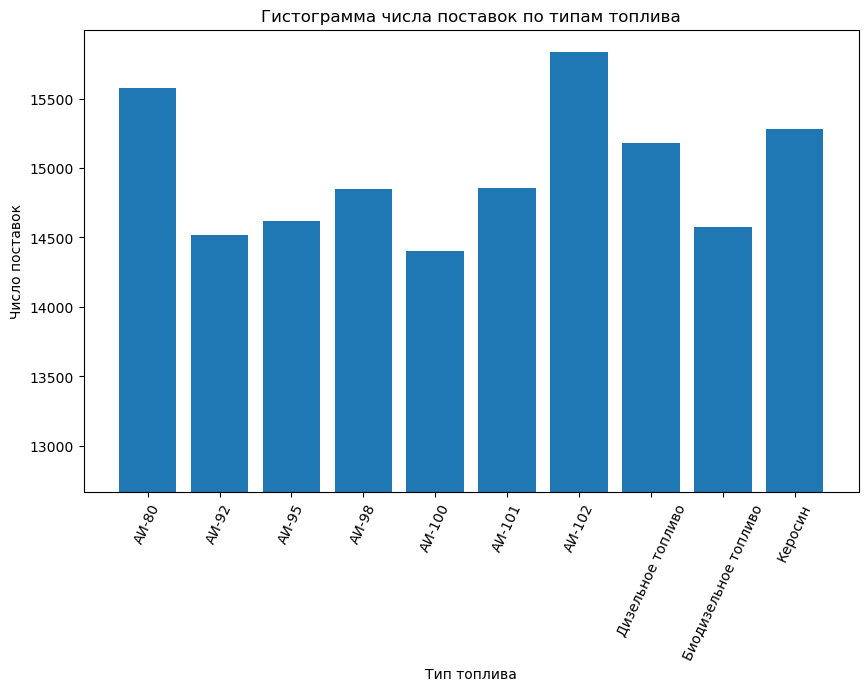

In [3]:
plt.figure(figsize=(10, 6))
plt.bar(df31['Type'], df31['Число поставок'])
plt.xlabel('Тип топлива')
plt.ylabel('Число поставок')
plt.title('Гистограмма числа поставок по типам топлива')
plt.xticks(rotation=65)

#Задание лимита сниху и сверху для y
plt.ylim(df31['Число поставок'].max()/1.25, df31['Число поставок'].max()*1.01)
plt.savefig('31.pdf')
plt.show()

### Гистограмма запросов 3.1 и 3.2

In [4]:
df32 = pd.read_csv("query3.2.csv")
df32

,Type,Число поставок
0,АИ-100,231
1,АИ-101,238
2,АИ-102,251
3,АИ-80,249
4,АИ-92,235
5,АИ-95,233
6,АИ-98,235
7,Биодизельное топливо,231
8,Дизельное топливо,240
9,Керосин,243


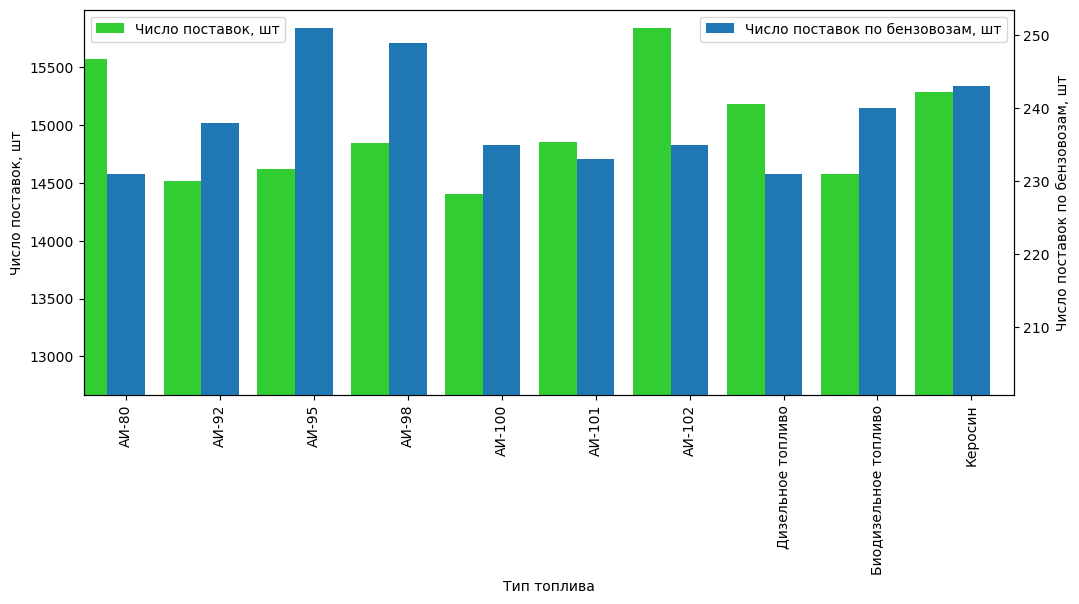

In [6]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111) # Создаем matplotlib axes
ax2 = ax.twinx() # Создаем другие axes, которые разделяют ту же ось x

# Определяем ширину столбцов
width = 0.4

# Определяем позиции для столбцов
positions1 = np.arange(len(df31['Type']))
positions2 = [x + width for x in positions1]

# Строим столбцы
df31['Число поставок'].plot(kind='bar', color='limegreen', ax=ax, width=width, position=1, label='Число поставок, шт')
df32['Число поставок'].plot(kind='bar', ax=ax2, width=width, position=0, label='Число поставок по бензовозам, шт')

# Устанавливаем метки и легенду
ax.set_ylabel('Число поставок, шт')
ax2.set_ylabel('Число поставок по бензовозам, шт')
ax.set_xlabel('Тип топлива')
ax.set_xticks(positions1 + width / 2)
ax.set_xticklabels(df31['Type'])

# Изменение начала отсчета по оси Y
ax.set_ylim([df31['Число поставок'].max()/1.25, df31['Число поставок'].max()*1.01])  # для оси Y на первом графике
ax2.set_ylim([df32['Число поставок'].max()/1.25, df32['Число поставок'].max()*1.01])  # для оси Y на втором графике

# Добавление легенды
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### Гистограмма запроса 5

In [7]:
df5 = pd.read_csv("query5.csv")
df5.head()

,Число бензовозов,Число доставок
0,1,103
1,2,107
2,1,108
3,1,109
4,1,110


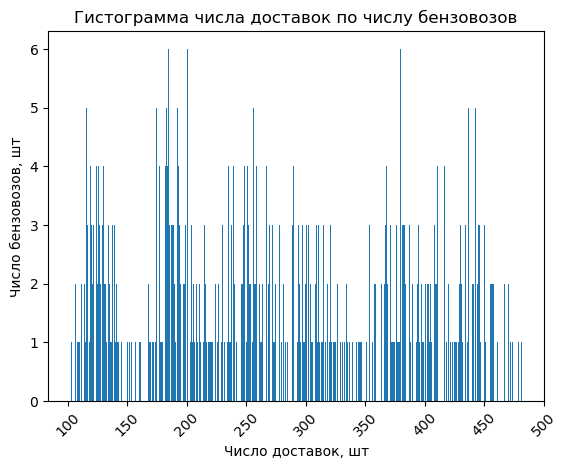

In [8]:
plt.bar(df5['Число доставок'], df5['Число бензовозов'])
plt.xlabel('Число доставок, шт')
plt.ylabel('Число бензовозов, шт')
plt.title('Гистограмма числа доставок по числу бензовозов')
plt.xticks(rotation=45)
plt.show()

### Гистограмма запроса 8

In [7]:
df8 = pd.read_csv("query8.csv")
df8 = df8.tail(200) # оставляем первые 50 строк
df8.head()

,Surname,Name,Middle_name,Type,Количество доставок
4797,Красильников,Прокофий,Аверьянович,Керосин,410
4798,Колобов,Аркадий,Георгиевич,АИ-100,522
4799,Колобов,Аркадий,Георгиевич,АИ-101,624
4800,Колобов,Аркадий,Георгиевич,АИ-102,430
4801,Колобов,Аркадий,Георгиевич,АИ-80,432


In [8]:
df8["ФИО"] = df8['Surname'] + ' ' + df8['Name'] + ' ' + df8['Middle_name'] 
df8.head()

,Surname,Name,Middle_name,Type,Количество доставок,ФИО
4797,Красильников,Прокофий,Аверьянович,Керосин,410,Красильников Прокофий Аверьянович
4798,Колобов,Аркадий,Георгиевич,АИ-100,522,Колобов Аркадий Георгиевич
4799,Колобов,Аркадий,Георгиевич,АИ-101,624,Колобов Аркадий Георгиевич
4800,Колобов,Аркадий,Георгиевич,АИ-102,430,Колобов Аркадий Георгиевич
4801,Колобов,Аркадий,Георгиевич,АИ-80,432,Колобов Аркадий Георгиевич


In [9]:
df8['FIO_cat'] = pd.Categorical(df8['ФИО']).codes
df8['Type_cat'] = pd.Categorical(df8['Type']).codes

In [10]:
color_dict = {
    'АИ-100': 'pink',  
    'АИ-101': 'orange',  
    'АИ-102': 'purple',  
    'АИ-80': 'indigo',   
    'АИ-92': 'lime',
    'Керосин': 'navy',
    'Биодизельное топливо': 'turquoise',
    'Дизельное топливо': 'w',
    'АИ-98': 'fuchsia',
    'АИ-95': 'aqua'
}

colors = df8['Type'].map(color_dict).tolist()

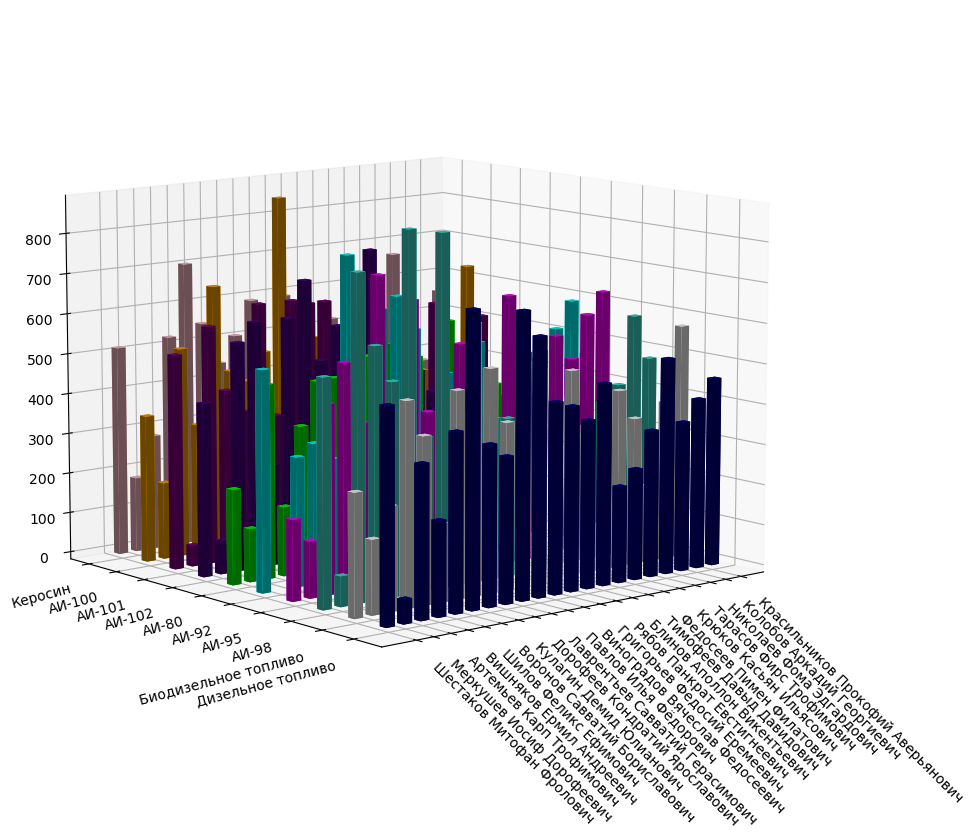

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
x = df8['FIO_cat']
y = df8['Type_cat']
z = [0] * len(df8)  # Начальное положение каждого столбца
# Ширина каждого столбца по осям x и y
dx = 0.5  
dy = 0.2
dz = df8['Количество доставок']  # Высота каждого столбца по оси z

ax.bar3d(x, y, z, dx, dy, dz, color=colors)

# Удаление стандартных меток
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

ax.set_xticks(range(len(df8['ФИО'].unique())))
ax.set_xticklabels(df8['ФИО'].unique(), rotation=-45, ha='left')

ax.set_yticks(range(len(df8['Type'].unique())))
ax.set_yticklabels(df8['Type'].unique(), rotation=15, ha='right')

# Настройка углов обзора
ax.view_init(elev=10, azim=50)

plt.show()